In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import  linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [7]:
import matplotlib
%matplotlib inline
from google.colab import files

In [8]:
uploaded = files.upload()

Saving iris.data to iris.data


In [9]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn,length = len(uploaded[fn])))

User uploaded file "iris.data" with length 4609 bytes


In [10]:
uploaded

{'iris.data': b'sepallength,sepalwidth,petallength,petalwidth,classlabel\t\n5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-seto

In [12]:
df=pd.read_csv('iris.data')

In [13]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,classlabel\t
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#count if each species
df.groupby("classlabel\t").size()

classlabel\t
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [16]:
#checking the metadata information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   classlabel	  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
#checking how data is spread
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


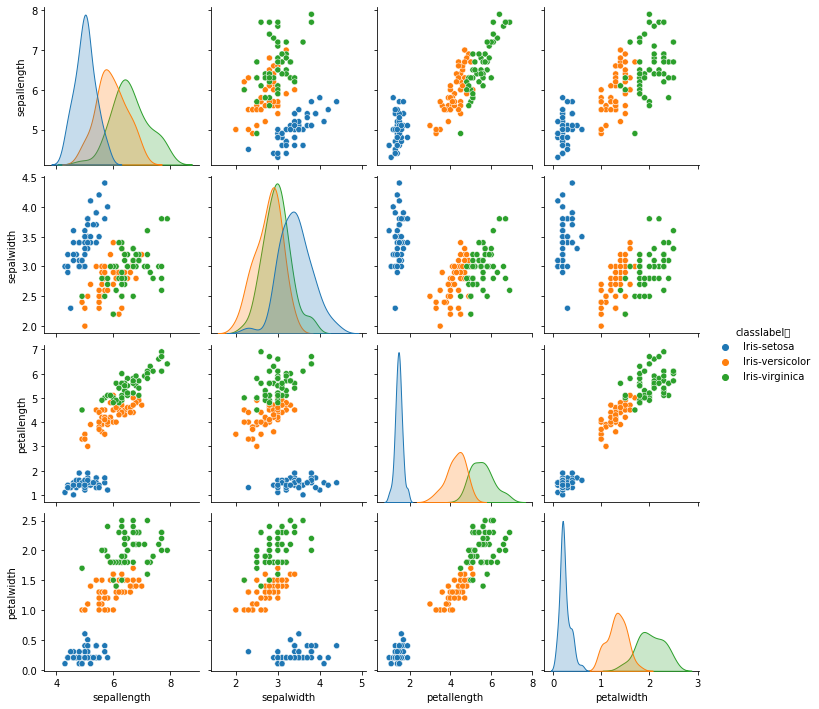

In [19]:
#visulalizing data
sns.pairplot(df,hue='classlabel\t')

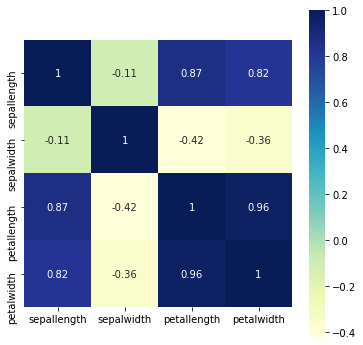

In [27]:
#correlation
plt.figure(figsize=(6,6))
corrmat = df.corr()
sns.heatmap(corrmat,annot=True,square=True,cmap='YlGnBu')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

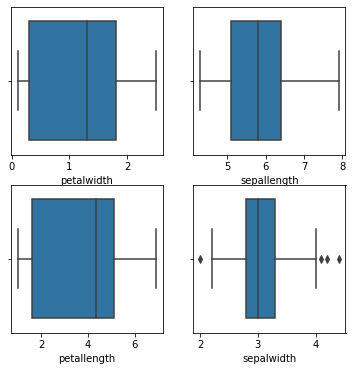

In [37]:
#checking for outliers
cols = set(df.columns)-{'classlabel\t'}
count = 1
plt.subplots(figsize=(6,6))
for i in cols:
  plt.subplot(2,2,count)
  sns.boxplot(df[i])
  count +=1
plt.show()


In [41]:
#data modelling
X=df.drop(['classlabel\t'],axis=1)
Y=df['classlabel\t']
#checking shape of data
print(X.shape)
#checking shape of target variable
print(Y.shape)

(150, 4)
(150,)


In [42]:
#calculating the hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [55]:
def hopkins(X):
    d=X.shape[1]
    n=len(X) #rows
    m=int(0.1 * n)
    nbrs= NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0,n,1),m)

    ujd = []
    wjd = []

    for j in range(0,m):
      u_dist, _= nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1), 2,return_distance=True)
      ujd.append(u_dist[0][1])
      w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2,return_distance=True)
      wjd.append(w_dist[0][1])


    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
      print(ujd, wjd)
      H=0
    return H

In [56]:
#hopkins measure
hopkins(X)

0.83464553195789

In [57]:
#applying KMeans clusturing algo
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 0 4 3 0 0 3 2 3 0 3 0
 0 0 4 0 0 0 3 3 4 0 4 3 4 0 3 4 4 0 3 3 3 0 4 4 3 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]


array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

In [58]:
##apply silhouette analysis
sse_ = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k).fit(X)
  sse_.append([k,silhouette_score(X,kmeans.labels_)])

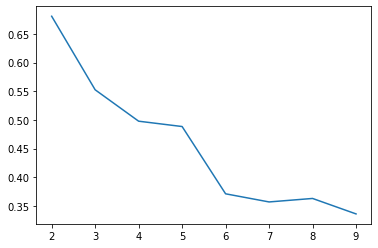

In [59]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1]);

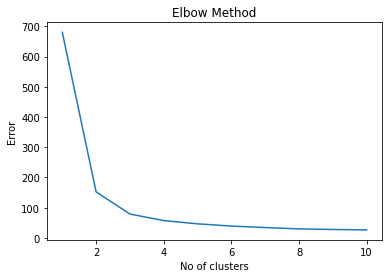

In [60]:
#Lets use the elbow curve method to identify the ideal number of clusters.

Error=[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i).fit(X)
  kmeans.fit(X)
  Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [61]:
#final model with k=3
kmeans = KMeans(n_clusters=3,max_iter=300)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [63]:
#assig the label 
X_grouped = X.copy()
X_grouped['cluster_id'] = kmeans.labels_
X_grouped.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
#checking how many data points are assigned to each cluster ids
X_grouped['cluster_id'].value_counts()

1    62
0    50
2    38
Name: cluster_id, dtype: int64

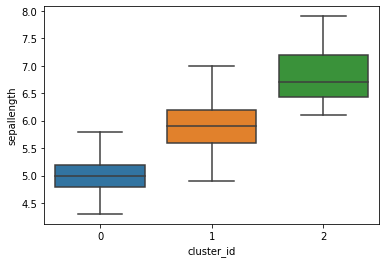

In [65]:
#Box plot for cluster id versus sepal length
sns.boxplot(x='cluster_id',y='sepallength', data=X_grouped)

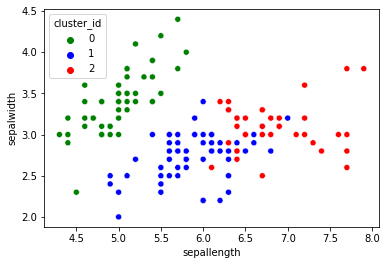

In [66]:
#scatter plat for Sepal length Versus sepal width
sns.scatterplot(x='sepallength',y='sepalwidth', hue='cluster_id', data=X_grouped,palette=['green','blue','red'])

In [67]:
#Hierarchical Clustering

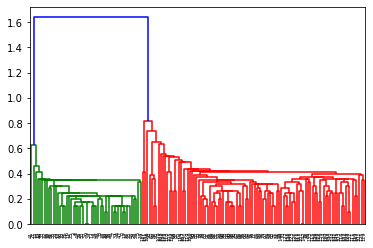

In [70]:
#single linkage
mergings = linkage(X, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
#above we identify 2 clusters
cluster_labels__single = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels__single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
#assign cluster labels
X_grouped['cluster_labels_single'] = cluster_labels__single
X_grouped.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster_id,cluster_labels_single
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [73]:
#checking how many data points are assign to each cluster ids
X_grouped['cluster_labels_single'].value_counts()

1    100
0     50
Name: cluster_labels_single, dtype: int64

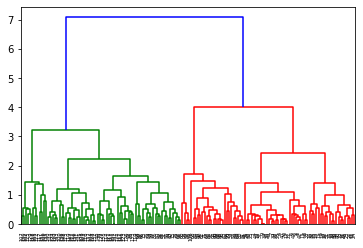

In [75]:
#complete linkage
mergings = linkage(X, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [76]:
#from above we identify 3 clusters
cluster_labels_complete = cut_tree(mergings,n_clusters=3).reshape(-1, )
cluster_labels_complete

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
#assign cluster labels
X_grouped['cluster_labels_complete'] = cluster_labels_complete
X_grouped.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster_id,cluster_labels_single,cluster_labels_complete
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0


In [78]:
#checking how many data points are assigned to each cluster ids
X_grouped['cluster_labels_complete'].value_counts()

1    72
0    50
2    28
Name: cluster_labels_complete, dtype: int64

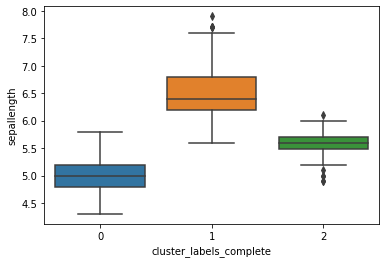

In [79]:
#box plot for cluster id versus sepal length
sns.boxplot(x='cluster_labels_complete', y='sepallength', data=X_grouped)

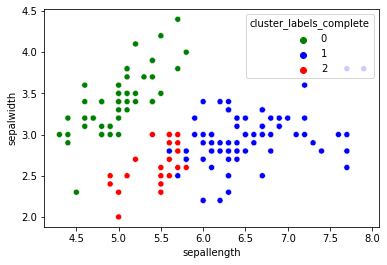

In [80]:
#scater plot for Sepal Length Versus Sepal Width
sns.scatterplot(x='sepallength', y='sepalwidth', hue='cluster_labels_complete', data= X_grouped, palette=['green','blue','red'])

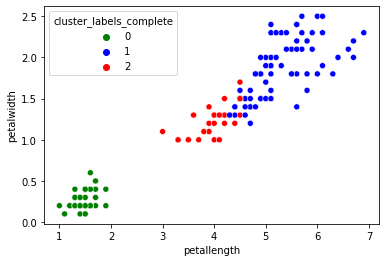

In [81]:
#scater plot for petal length Versus petal Width
sns.scatterplot(x='petallength', y='petalwidth', hue='cluster_labels_complete', data= X_grouped, palette=['green','blue','red'])

In [82]:
# Guassian mixture model


Text(0, 0.5, 'Feature 1')

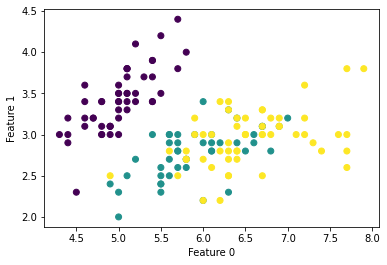

In [83]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=labels)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [84]:
#assign cluster labels
X_grouped['cluster_labels_gmm'] = labels
#checking how many data points are assigned to each cluster ids
X_grouped['cluster_labels_gmm'].value_counts()

2    55
0    50
1    45
Name: cluster_labels_gmm, dtype: int64

In [85]:
#Prediction the data
#kmeans prediction
y_pred_kmeans = kmeans.predict(X)
#Hierarchical clustering
y_pred_hierarchical = cut_tree(mergings, n_clusters=3).reshape(-1, )
#GMM clustering
y_pred_gmm = gmm.predict(X)

In [89]:
#checking ARI(Adjusted Rand Index)
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance
print("ARI of KMeans = ",adjusted_rand_score(Y,y_pred_kmeans))


ARI of KMeans =  0.7302382722834697


In [90]:
#Hierarchical performance
print("ARI of Hierarchical = ",adjusted_rand_score(Y,y_pred_hierarchical))

ARI of Hierarchical =  0.64225125183629


In [91]:
#GMM performance
print("ARI of Hierarchical = ",adjusted_rand_score(Y,y_pred_gmm))

ARI of Hierarchical =  0.9038742317748124
